## Ejercicio 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


diabetes = pd.read_csv('diabetes.csv')

diabetes.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


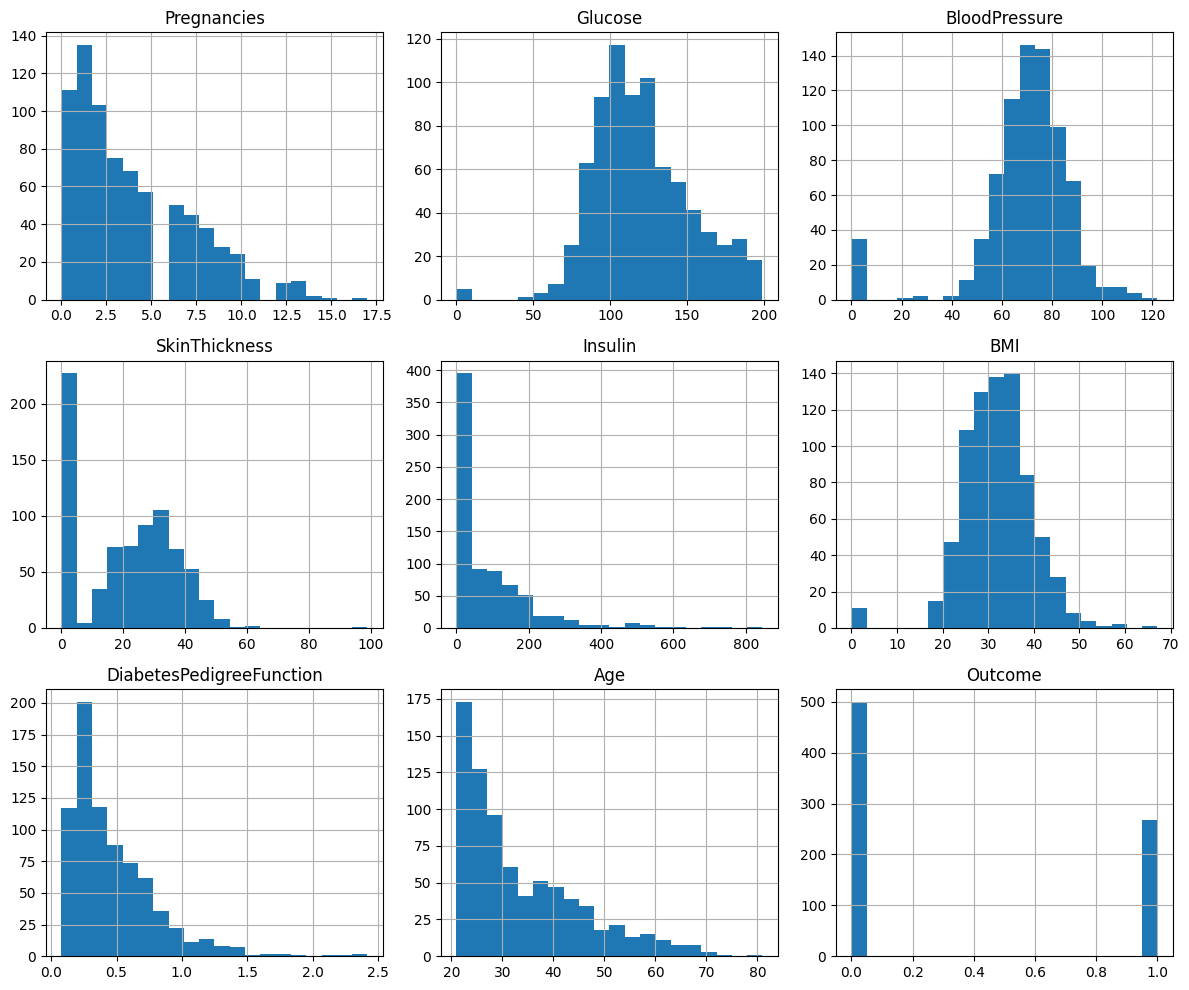

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

diabetes.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()
plt.savefig('diabetes_histogram.png')


> Como se puede apreciar en los histogramas, hay datos anomalos en Insulin, SkinThickness, BMI, Glucose y BloodPressure.

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


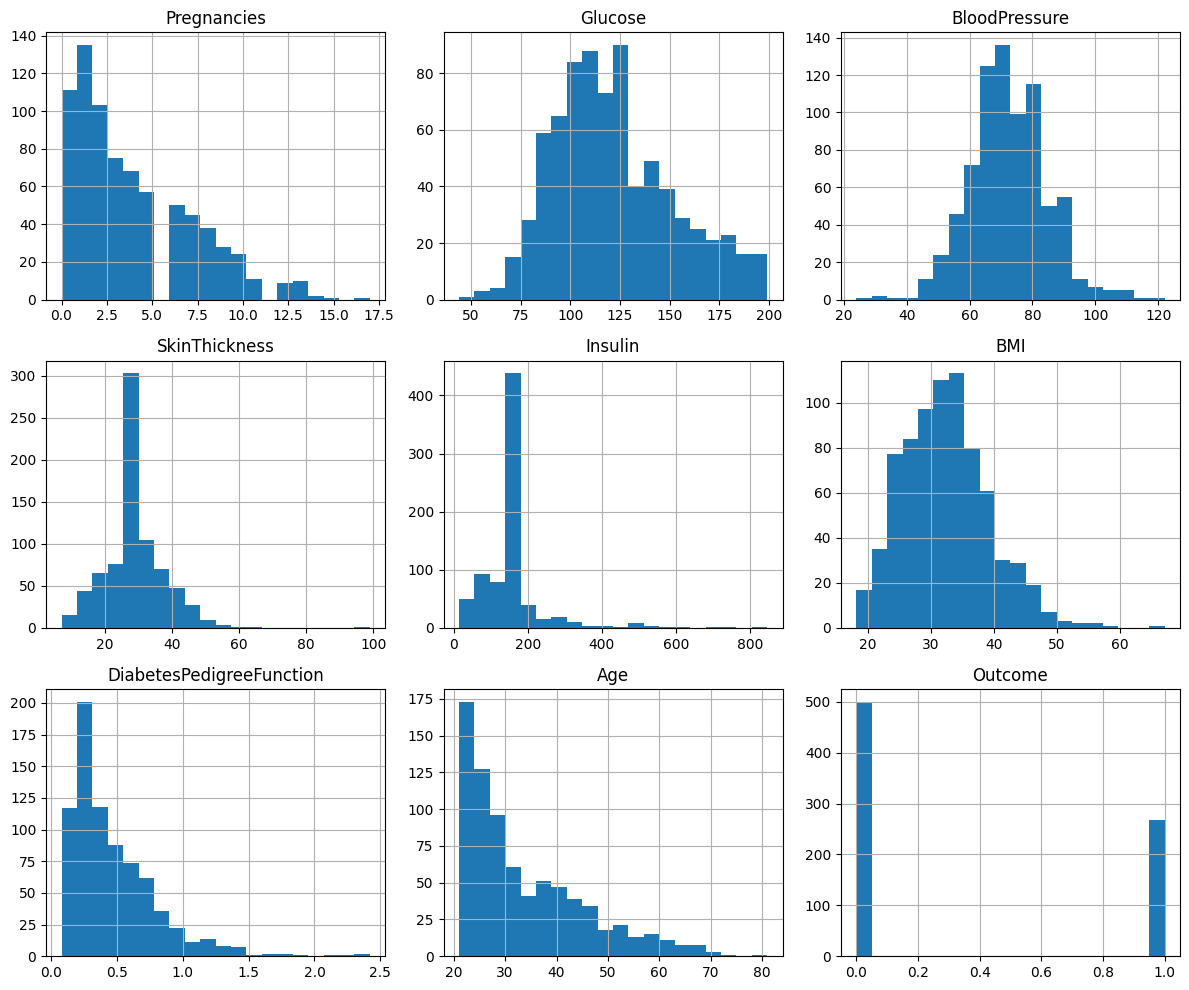

<Figure size 640x480 with 0 Axes>

In [6]:
indicadores_anomalos = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print((diabetes[indicadores_anomalos] == 0 ).sum() )
diabetes[indicadores_anomalos] = diabetes[indicadores_anomalos].replace(0, np.nan)
diabetes[indicadores_anomalos] = diabetes[indicadores_anomalos].fillna(diabetes[indicadores_anomalos].mean())
diabetes.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()
plt.savefig('diabetes_histogram.png')


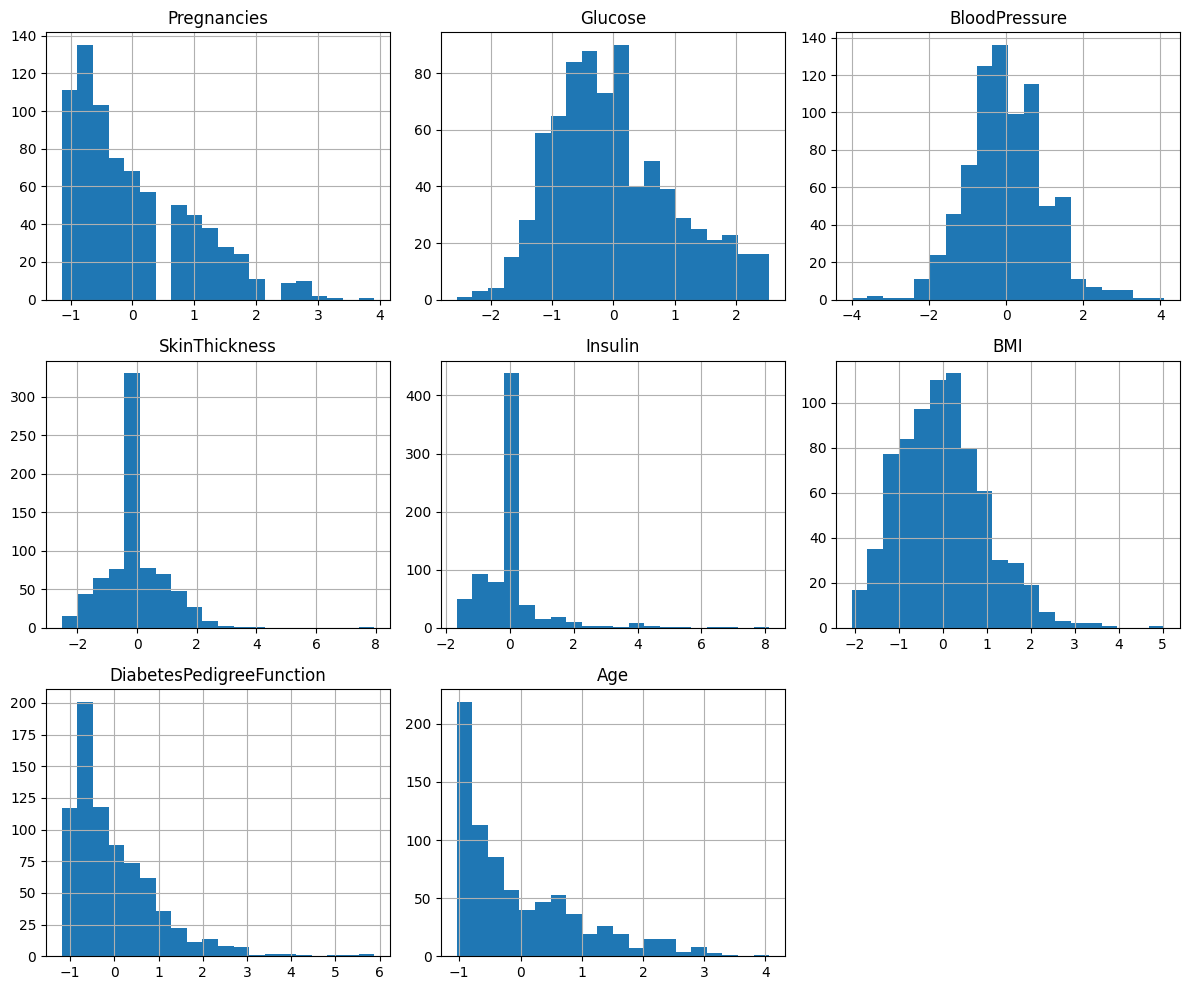

<Figure size 640x480 with 0 Axes>

In [7]:
# Escalado de características numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
diabetes_scaled = diabetes.copy()

X = diabetes_scaled.drop(columns=['Outcome'])
y = diabetes_scaled['Outcome']

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Visualización de las características escaladas
X_scaled_df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()
plt.savefig('diabetes_histogram.png')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# División del dataset en train, validación y test
x_train, x_temporal, y_train, y_temporal = train_test_split(X_scaled_df, y, test_size=0.4, random_state=42, stratify=y)
x_validacion, x_test, y_validacion, y_test = train_test_split(x_temporal, y_temporal, test_size=0.5, random_state=42, stratify=y_temporal)

=== Regresión Logística ===
Accuracy: 0.7597402597402597
Precision: 0.7570293783886017
Recall: 0.7597402597402597
F1-Score: 0.7580832960143304

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



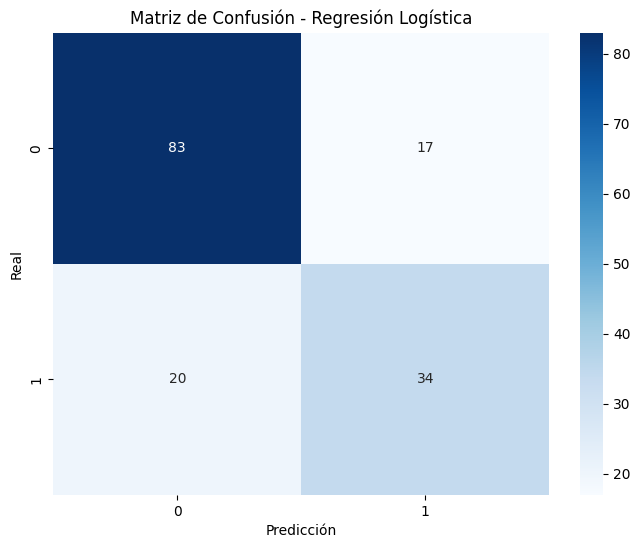

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenamiento del modelo de Regresión Logística
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(x_train, y_train)

# Predicciones
y_pred_val_log = modelo_log.predict(x_validacion)

# Métricas
accuracy = accuracy_score(y_validacion, y_pred_val_log)
precision = precision_score(y_validacion, y_pred_val_log, average='weighted')
recall = recall_score(y_validacion, y_pred_val_log, average='weighted')
f1 = f1_score(y_validacion, y_pred_val_log, average='weighted')
cm = confusion_matrix(y_validacion, y_pred_val_log)

# Resultados
print("=== Regresión Logística ===")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_validacion, y_pred_val_log))

# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


=== Árbol de Decisión ===
Accuracy: 0.7142857142857143
Precision: 0.7259066319374875
Recall: 0.7142857142857143
F1-Score: 0.7181855500821019

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.58      0.67      0.62        54

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.73      0.71      0.72       154



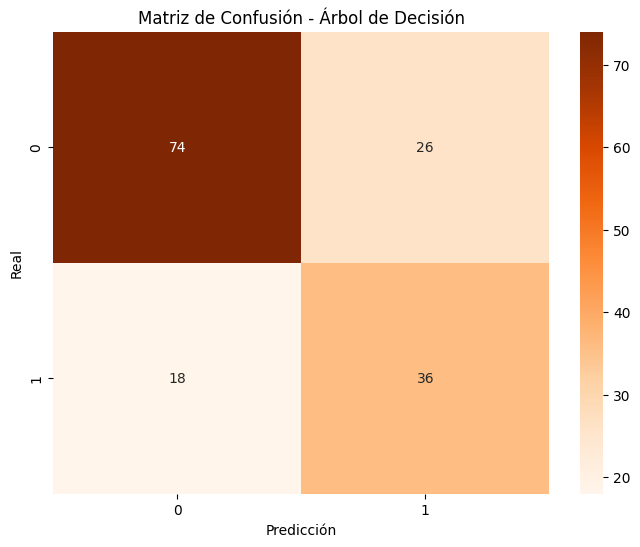

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

# Entrenamiento del modelo con profundidad limitada
modelo_arbol = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_arbol.fit(x_train, y_train)

# Predicción en validación
y_pred_val_arbol = modelo_arbol.predict(x_validacion)

# Métricas
accuracy = accuracy_score(y_validacion, y_pred_val_arbol)
precision = precision_score(y_validacion, y_pred_val_arbol, average='weighted')
recall = recall_score(y_validacion, y_pred_val_arbol, average='weighted')
f1 = f1_score(y_validacion, y_pred_val_arbol, average='weighted')
cm = confusion_matrix(y_validacion, y_pred_val_arbol)

# Resultados
print("=== Árbol de Decisión ===")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_validacion, y_pred_val_arbol))

# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


=== KNN (k=5) ===
Accuracy: 0.7597402597402597
Precision: 0.7570293783886017
Recall: 0.7597402597402597
F1-Score: 0.7580832960143304

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



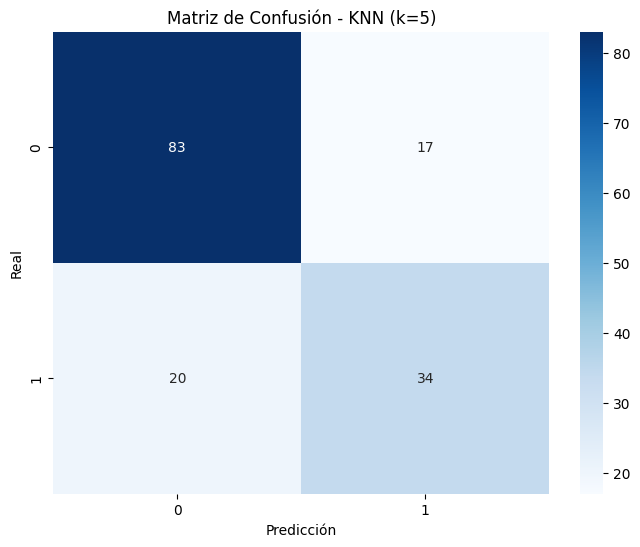

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenamiento con k=5 (valor comúnmente razonable)
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(x_train, y_train)

# Evaluación en validación
y_pred_val_knn = modelo_knn.predict(x_validacion)

# Métricas
accuracy = accuracy_score(y_validacion, y_pred_val_knn)
precision = precision_score(y_validacion, y_pred_val_knn, average='weighted')
recall = recall_score(y_validacion, y_pred_val_knn, average='weighted')
f1 = f1_score(y_validacion, y_pred_val_knn, average='weighted')
cm = confusion_matrix(y_validacion, y_pred_val_knn)

# Resultados
print("=== KNN (k=5) ===")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nClassification Report:\n", classification_report(y_validacion, y_pred_val_knn))


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - KNN (k=5)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


## Ejercicio 3

In [12]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


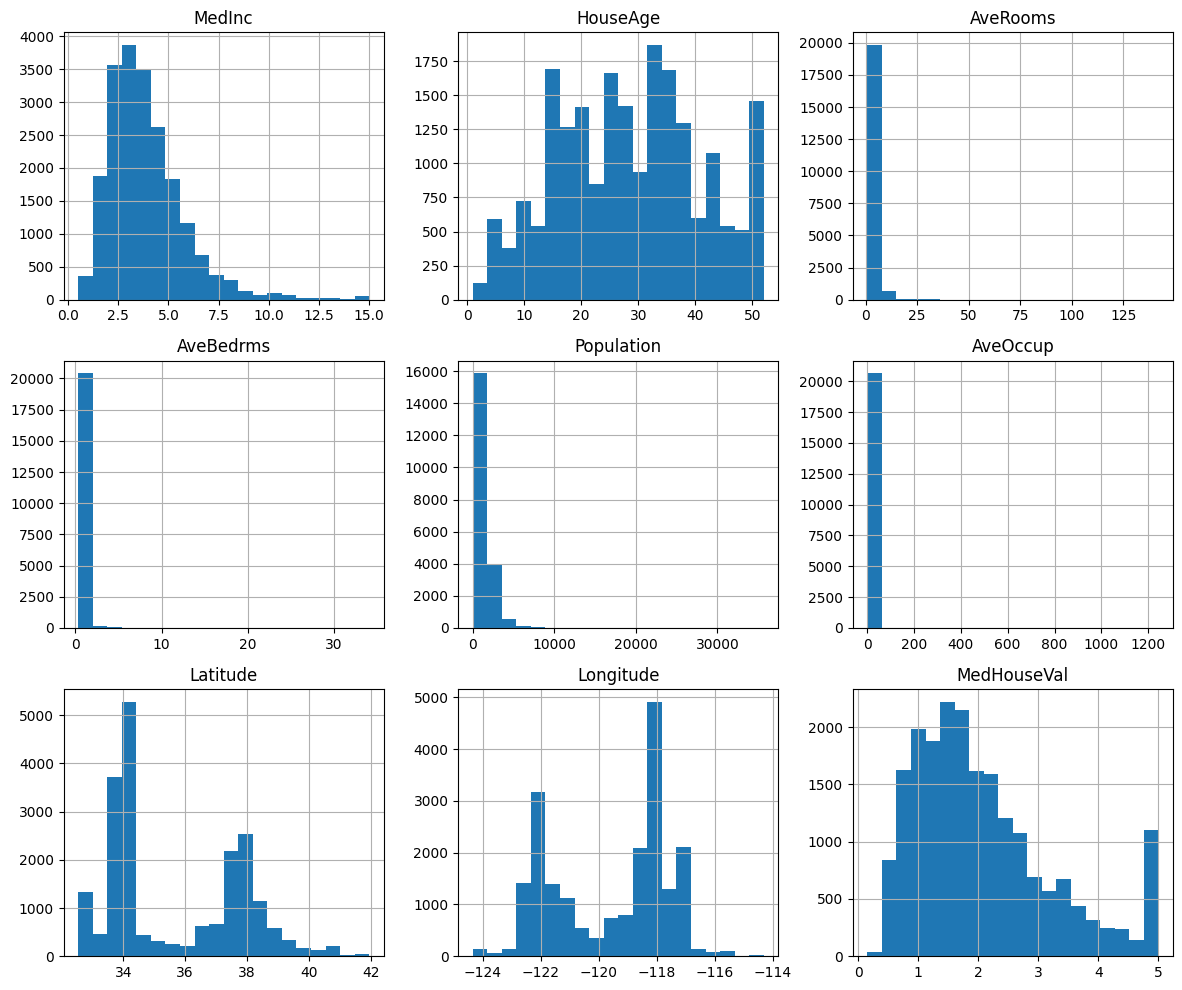

<Figure size 640x480 with 0 Axes>

In [13]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()
plt.savefig('CaliforniaHousing_histogram.png')

In [19]:
#Escalado de características numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()


In [28]:
# División del dataset en train, validación y test
X = df_scaled.drop(columns=['MedHouseVal'])
y = df_scaled['MedHouseVal']
# 60% entrenamiento, 20% validación, 20% test
x_train, x_temporal, y_train, y_temporal = train_test_split(X, y, test_size=0.4, random_state=42)
x_validacion, x_test, y_validacion, y_test = train_test_split(x_temporal, y_temporal, test_size=0.5, random_state=42)


In [36]:
# Regresión Lineal
from sklearn.linear_model import LinearRegression
modelo_regresion = LinearRegression()
modelo_regresion.fit(x_train, y_train)
# Predicciones
y_pred_val_regresion = modelo_regresion.predict(x_validacion)
# Coeficientes 
coeficientes = modelo_regresion.coef_
intercepto = modelo_regresion.intercept_
print("=== Regresión Lineal ===")
print("Coeficientes:", coeficientes)
print("Intercepto:", intercepto)

=== Regresión Lineal ===
Coeficientes: [ 4.49244604e-01  9.50481954e-03 -1.28102920e-01  8.20334578e-01
 -1.29461684e-06 -3.21412657e-03 -4.18425852e-01 -4.33787875e-01]
Intercepto: -37.09579393590686


In [37]:
# Regresión Polinómica
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_validacion_poly = poly.transform(x_validacion)
modelo_regresion_poly = LinearRegression()
modelo_regresion_poly.fit(x_train_poly, y_train)
# Predicciones
y_pred_val_regresion_poly = modelo_regresion_poly.predict(x_validacion_poly) 


In [38]:
# Arbol de Decisión para regresión
from sklearn.tree import DecisionTreeRegressor
modelo_arbol_regresion = DecisionTreeRegressor(max_depth=5, random_state=42)
modelo_arbol_regresion.fit(x_train, y_train)
# Predicciones
y_pred_val_arbol_regresion = modelo_arbol_regresion.predict(x_validacion)


In [39]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
modelo_rf_regresion = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf_regresion.fit(x_train, y_train)
# Predicciones
y_pred_val_rf_regresion = modelo_rf_regresion.predict(x_validacion)


In [40]:
# Gradient Boosting Regressor parametros por defecto
from sklearn.ensemble import GradientBoostingRegressor
modelo_gb_regresion = GradientBoostingRegressor(random_state=42)
modelo_gb_regresion.fit(x_train, y_train)
# Predicciones
y_pred_val_gb_regresion = modelo_gb_regresion.predict(x_validacion)


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluación de los modelos
# Evaluación para Regresión Lineal
mse_reg = mean_squared_error(y_validacion, y_pred_val_regresion)
mae_reg = mean_absolute_error(y_validacion, y_pred_val_regresion)
r2_reg = r2_score(y_validacion, y_pred_val_regresion)
print("=== Regresión Lineal ===")
print("MSE:", mse_reg)
print("MAE:", mae_reg)
print("R2:", r2_reg)
print()

# Evaluación para Regresión Polinómica
mse_poly = mean_squared_error(y_validacion, y_pred_val_regresion_poly)
mae_poly = mean_absolute_error(y_validacion, y_pred_val_regresion_poly)
r2_poly = r2_score(y_validacion, y_pred_val_regresion_poly)
print("=== Regresión Polinómica ===")
print("MSE:", mse_poly)
print("MAE:", mae_poly)
print("R2:", r2_poly)
print()

# Evaluación para Árbol de Decisión
mse_arbol = mean_squared_error(y_validacion, y_pred_val_arbol_regresion)
mae_arbol = mean_absolute_error(y_validacion, y_pred_val_arbol_regresion)
r2_arbol = r2_score(y_validacion, y_pred_val_arbol_regresion)
print("=== Árbol de Decisión ===")
print("MSE:", mse_arbol)
print("MAE:", mae_arbol)
print("R2:", r2_arbol)
print()

# Evaluación para Random Forest
mse_rf = mean_squared_error(y_validacion, y_pred_val_rf_regresion)
mae_rf = mean_absolute_error(y_validacion, y_pred_val_rf_regresion)
r2_rf = r2_score(y_validacion, y_pred_val_rf_regresion)
print("=== Random Forest ===")
print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R2:", r2_rf)
print()

# Evaluación para Gradient Boosting
mse_gb = mean_squared_error(y_validacion, y_pred_val_gb_regresion)
mae_gb = mean_absolute_error(y_validacion, y_pred_val_gb_regresion)
r2_gb = r2_score(y_validacion, y_pred_val_gb_regresion)
print("=== Gradient Boosting ===")
print("MSE:", mse_gb)
print("MAE:", mae_gb)
print("R2:", r2_gb)
print()


=== Regresión Lineal ===
MSE: 0.5325643962848101
MAE: 0.5336164161743375
R2: 0.5920099290350325

=== Regresión Polinómica ===
MSE: 0.4895699215302272
MAE: 0.4742310859460261
R2: 0.6249473896099276

=== Árbol de Decisión ===
MSE: 0.5363979165440508
MAE: 0.5336285032308284
R2: 0.589073123244927

=== Random Forest ===
MSE: 0.26658422426445494
MAE: 0.34100386455910875
R2: 0.7957735865661774

=== Gradient Boosting ===
MSE: 0.2943674332451633
MAE: 0.37771955870444757
R2: 0.77448926211124



C:\Users\Francisco\AppData\Local\Temp\ipykernel_6404\2738341804.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(['Regresión Lineal', 'Regresión Polinómica', 'Árbol de Decisión', 'Random Forest', 'Gradient Boosting'], rotation=45)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_6404\2738341804.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(['Regresión Lineal', 'Regresión Polinómica', 'Árbol de Decisión', 'Random Forest', 'Gradient Boosting'], rotation=45)
C:\Users\Francisco\AppData\Local\Temp\ipykernel_6404\2738341804.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(['Regresión Lineal', 'Regresión Polinómica', 'Árbol de Decisión', 'Random Forest', 'Gradient

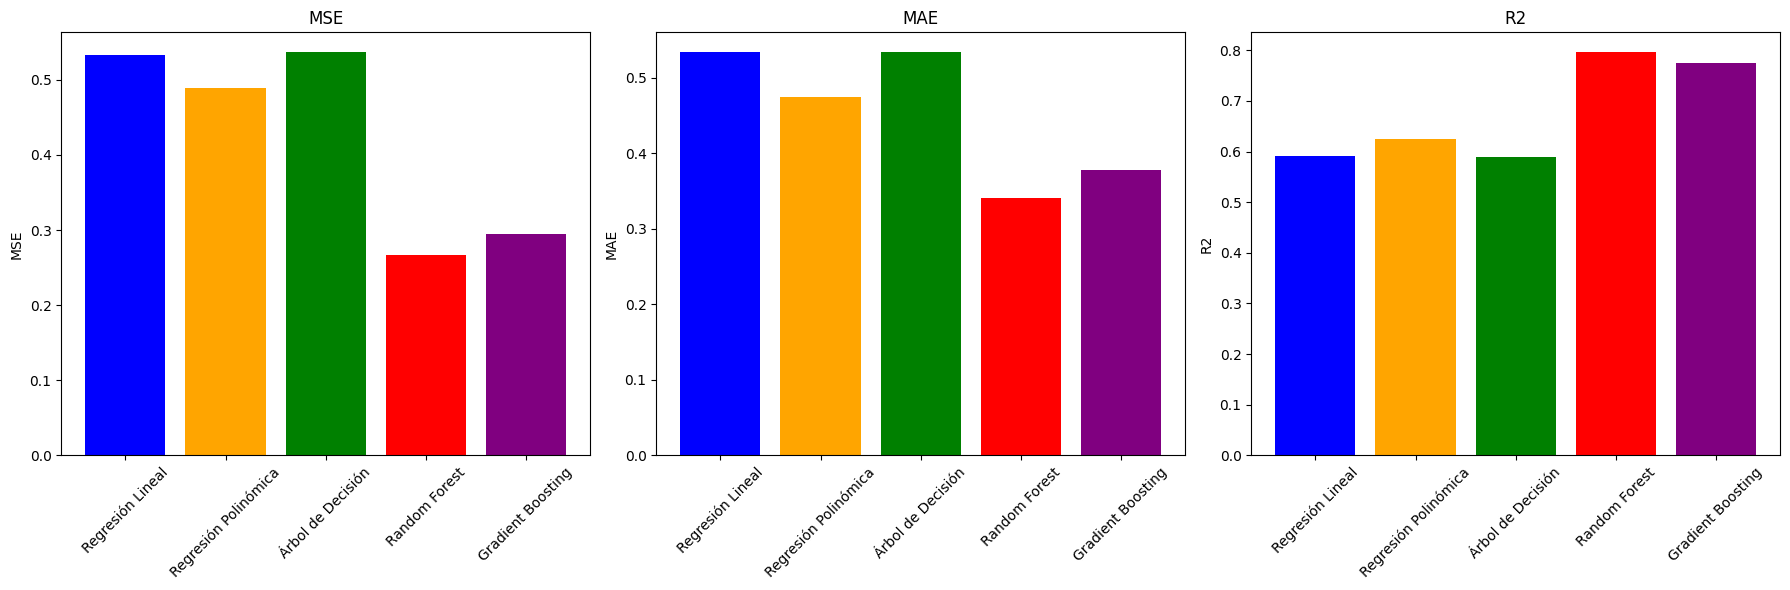

In [42]:
# Graficos de las metricas
import matplotlib.pyplot as plt
# Definir las métricas y sus valores
metricas = ['MSE', 'MAE', 'R2']
valores = [
    [mse_reg, mse_poly, mse_arbol, mse_rf, mse_gb],
    [mae_reg, mae_poly, mae_arbol, mae_rf, mae_gb],
    [r2_reg, r2_poly, r2_arbol, r2_rf, r2_gb]
]
# Crear un gráfico de barras para cada métrica
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, metric in enumerate(metricas):
    axs[i].bar(['Regresión Lineal', 'Regresión Polinómica', 'Árbol de Decisión', 'Random Forest', 'Gradient Boosting'], valores[i], color=['blue', 'orange', 'green', 'red', 'purple'])
    axs[i].set_title(metric)
    axs[i].set_ylabel(metric)
    axs[i].set_xticklabels(['Regresión Lineal', 'Regresión Polinómica', 'Árbol de Decisión', 'Random Forest', 'Gradient Boosting'], rotation=45)    
plt.tight_layout()
plt.savefig('metricas_regresion.png')
plt.show()